In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

from sklearn.ensemble import RandomForestClassifier

from preprocessing import preprocessing
from PDP import PDP

In [2]:
path = './data/german_raw.csv'
df = pd.read_csv(path)
df.head()

,GoodCustomer,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,...,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
0,1,Male,0,1,67,6,Electronics,1169,4,4,...,0,0,0,0,1,0,0,0,1,1
1,-1,Female,0,0,22,48,Electronics,5951,2,2,...,0,0,0,0,1,0,0,0,0,1
2,1,Male,0,1,49,12,Education,2096,2,3,...,0,0,0,0,1,0,0,0,1,0
3,1,Male,0,1,45,42,Furniture,7882,2,4,...,0,0,0,1,0,0,0,0,1,1
4,-1,Male,0,1,53,24,NewCar,4870,3,4,...,0,0,0,0,0,0,0,0,0,1


In [3]:
clf = RandomForestClassifier()

X = preprocessing(df.drop('GoodCustomer', axis = 1),
                   NA = 'mean_mode', normalization=True,
                     norm_type='norm', dummies = 'all').dropna(axis = 1)

y = df['GoodCustomer']

clf.fit(X, y)

RandomForestClassifier()

In [4]:
pdp = PDP(data = X, clf = clf)

In [5]:
feature = 'Age'
#feature = 'Age'

In [6]:
pdp_results = pdp.calcule_pdp(features=feature)

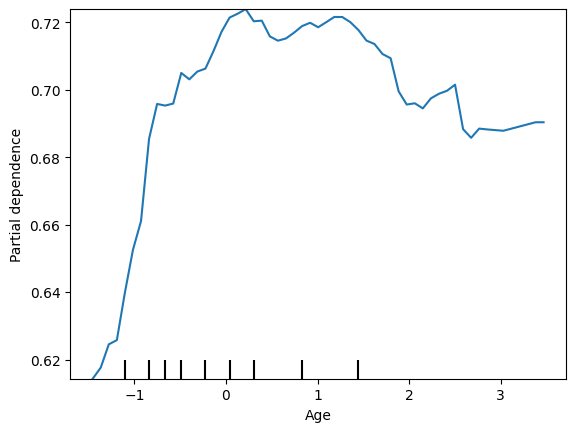

In [7]:
pdp.plot_pdp(feature=feature)

In [9]:
pdp.plot_pdp_iterativo(pdp_results=pdp_results, feature=feature)


Dash is running on http://127.0.0.1:8050/

